In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [44]:
df = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [48]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# copied from kaggle.com 

Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population


Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

<AxesSubplot:>

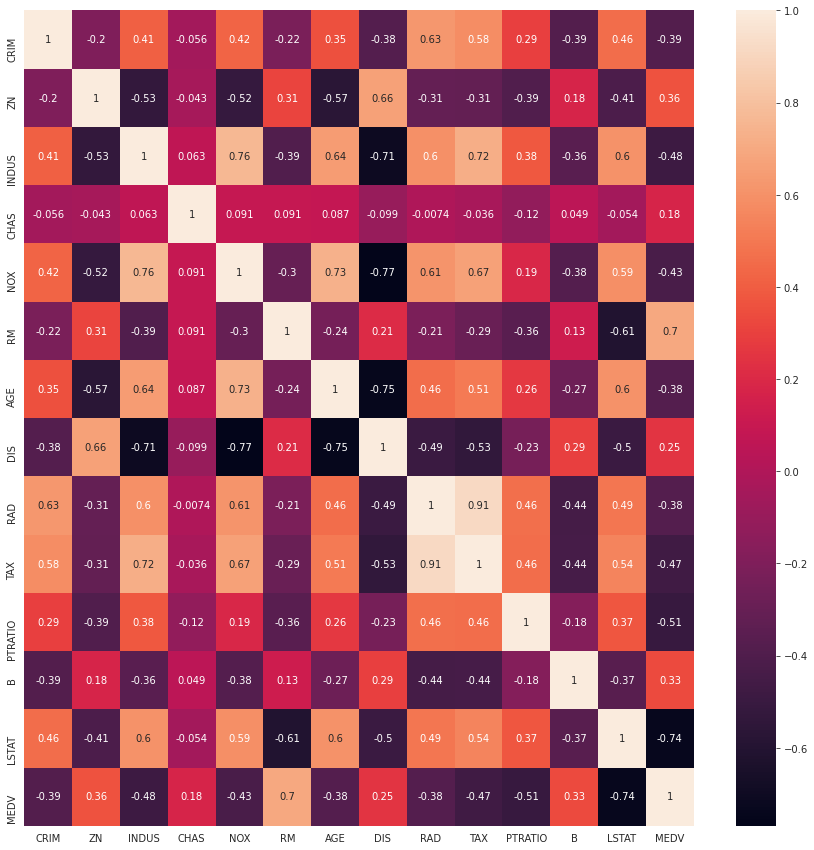

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot= True)
#some interesting correlations here
# highest positive correlation (0.91) is bewteen property tax (TAX) and 
# accessibility to radial highways
# greatest negative correlation lies between nitirc oxide concentration (NOX) and (DIS)
# weighted distance to five Boston employment centers.

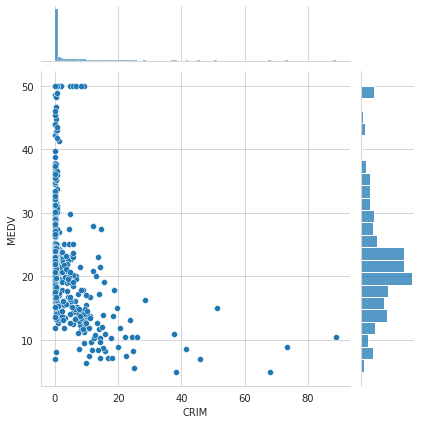

In [50]:
# one would expect a negative correlation between crime rate and median home value
sns.set_style('whitegrid')
sns.jointplot(x = 'CRIM', y = 'MEDV', data = df)
# although there is a bit more crime near the lower-value homes, the dataset 
# suggests Boston is a crime-free city

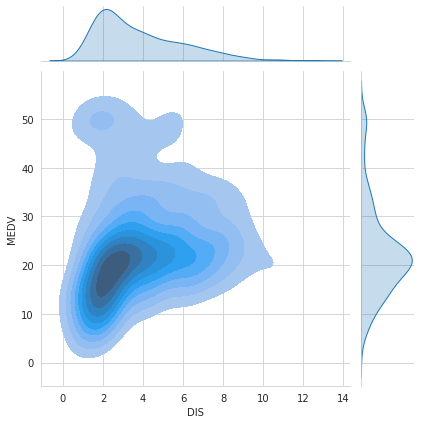

In [51]:
sns.jointplot(x = 'DIS', y = 'MEDV', data = df, kind = 'kde', fill = True )
# people in Boston live reasonabiliy close to employment centers and most home prices lie
# around $200,000.

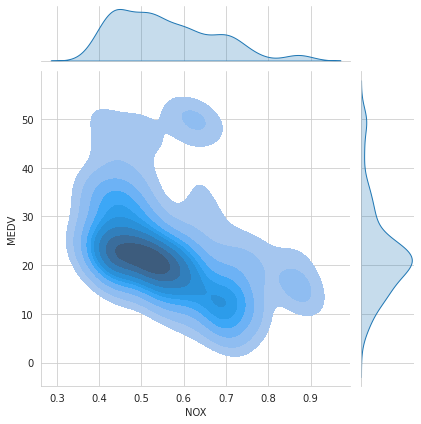

In [52]:
sns.jointplot(x = 'NOX', y = 'MEDV', data = df, kind = 'kde', fill = True)
# homes at or above the median home value have the highest nitric oxide concentrations.

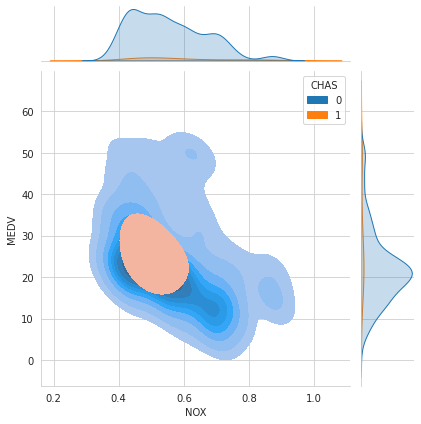

In [53]:
sns.jointplot(x = 'NOX', y = 'MEDV', data = df, kind = 'kde', fill = True, hue = 'CHAS')
# homes near the Charles River appeat to have the highest concentration of nitric oxides...
# is the river the source? possibly from fertilizer?

<AxesSubplot:xlabel='NOX', ylabel='MEDV'>

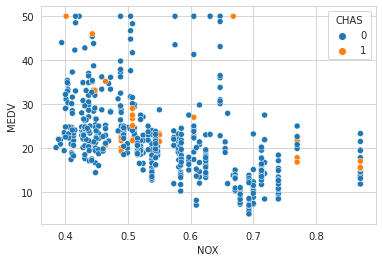

In [54]:

sns.scatterplot(x = 'NOX', y = 'MEDV', data = df, hue = 'CHAS')

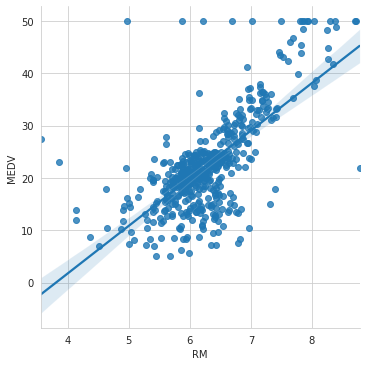

In [55]:
sns.lmplot(x = 'RM', y = 'MEDV', data = df)
# more rooms ( or more sq. footage) correlates to higher median home value.

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

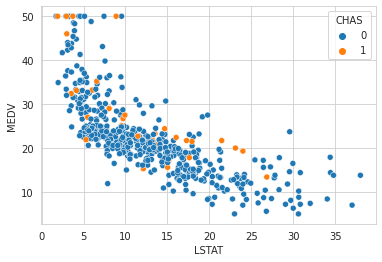

In [56]:
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df, hue = 'CHAS')
# strong negative correlation between lower status of population and median home value.
# Lowest part of population does not appear to live near the river

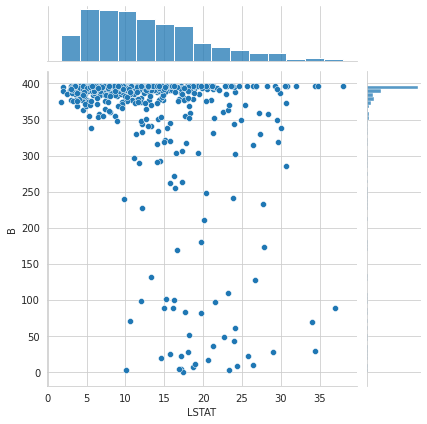

In [57]:
sns.jointplot(x = 'LSTAT', y = 'B', data = df)
# Black population in Boston is weighted to the upper-middle class

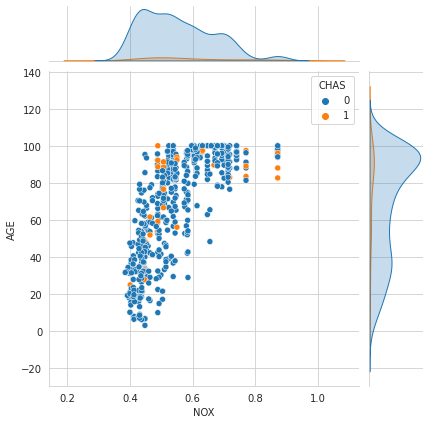

In [58]:
sns.jointplot(x = 'NOX', y = 'AGE', data = df, hue = 'CHAS' )
# Boston has many old homes. Older homes tend to have high nitric oxide levels and are
# near the Charles River

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# preparing to split the data into training and test sets
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [61]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Linear Regression

In [62]:
# Importing, instantianting and training our linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
# making predictions using our model on the test dataset
predictions = lm.predict(X_test)
print(lm.score(X_test,y_test)*100)

71.23963332666872


<AxesSubplot:xlabel='MEDV'>

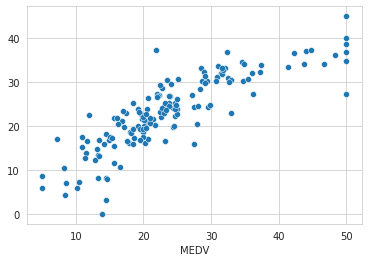

In [64]:
sns.scatterplot(x = y_test, y = predictions)

In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#we'll classify our models based on their RMSE

lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))

MAE: 3.8356963614189366
MSE: 28.547585271468137
RMSE: 5.34299403625609


# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_predictions = dtr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, dtr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_predictions)))

dtr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, dtr_predictions))

# decision tree improves the fit 

MAE: 3.4276315789473686
MSE: 21.800394736842104
RMSE: 4.66908928345155


# Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50)
rfr.fit(X_train, y_train)
rfr_predictions = rfr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rfr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_predictions)))

rfr_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rfr_predictions))

# random forest improve things even further

MAE: 2.618921052631579
MSE: 13.601922526315787
RMSE: 3.6880784327771265


# Summary - Random Forest Wins!

In [85]:
results = pd.DataFrame({'Model': ['Linear', 'Decision Tree', 'Random Forest'], \
                       'RMSE': [lm_RMSE, dtr_RMSE, rfr_RMSE]})
results

,Model,RMSE
0,Linear,5.342994
1,Decision Tree,4.669089
2,Random Forest,3.688078
